 __## Loading and Reading the data__

In [92]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#read the .csv file
#checking if the dataframe is loaded correctly
dfloan = pd.read_csv("loan.csv")
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


__Checking if the DataFrame is imported correctly__

In [4]:
#printing the number of rows and columns of the dataframe
print(dfloan.shape)
#It shows that it has 39717 rows and 111 columns. We can verify if it matches with the .csv file


#printing information about the DataFrame
print(dfloan.info())
#The listed information again shows the number of rows and columns. It also shows the data types of the entries and the memory usage

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [3]:
dfloan.dtypes
#This shows the datatypes of each column, we can see that there are three types of data

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


__Observations__

1. The data has been imported correctly
2. There are three types of data - Int, float and object

__## Data Cleaning__

The next step is to identify the columns with missing values and either remove those columns or fill up the missing values with appropriate data.

In [4]:
# Finding the percentage of the values missing in a column, as it will give us a better idea regarding which columns to be ignored or removed
dfloan.isna().mean().sort_values(ascending=False).round(4) * 100

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

__Observations__

1. In 54 columns,  100% of the information in a column (feature/variable) are missing. Such columns can be removed
2. There are some columns with very high percentage of missing values like 'next_pymnt_d' (97.13%) ,  'mths_since_last_record' (92.99%). We will retain them for now as they might be useful.
3. The first two columns 'Id' and 'member_Id' are unique values and can be ignored for the analysis
4. The columns 'url' and 'desc' are descriptive and will not be needed in the analysis.
5. We can retain only the 'id' column and delete the others. The 'Id' column can help us to identify any particular record in the future, if required.

__Dropping columns which are not required or have null values__

In [5]:
# Dropping all columns which are having 100% null values and listing the details of remaining columns
dfloan.dropna(axis=1, how='all', inplace = True)
dfloan.info()
#total remaining columns is 57

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
#Dropping columns which will not be needed in the analysis (Member_Id, Desc, Url, pymnt_plan, initial_list_status, policy_code, application_type, acc_now_delinq, delinq_amnt )
dfloan = dfloan.drop(['member_id','desc', 'url', 'pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'], axis=1)

#dropping the 'Member_Id' column as it is a unique value and will not be useful for the analysis
#dropping the column 'Desc' and 'Url' as they are descriptive values and will not be helpful for the analysis
#The columns 'pymnt_plan','initial_list_status', 'policy_code','application_type','acc_now_delinq' and 'delinq_amnt' has only one single value 'n','f', '1', 'individual', '0' and '0' respectively, so we can drop these columns for the analysis

dfloan = dfloan.drop(['chargeoff_within_12_mths', 'tax_liens', 'collections_12_mths_ex_med'],axis=1)
dfloan.shape
#dropping of the columns 'chargeoff_within_12_mths','tax_liens' and 'collections_12_mths_ex_med' as they have only 0 and NA values which are not meaningful

#remaining 45 columns


(39717, 45)

In [7]:
#Replacing the NA Values with 'Unknown' in the columns 'mths_since_last_delinq' and 'mths_since_last_record'
dfloan['mths_since_last_delinq'].fillna('Unknown', inplace=True)
dfloan['mths_since_last_record'].fillna('Unknown', inplace=True)

__## Analysis of the columns__

1. We will now analyze the columns one by one to check if they reveal any potential trend for the loan defaulters.
2. We will first check the categorical columns and the descriptive data and check its usefulness for the analysis. If they are not much useful, we will remove them or ignore them.
3. For the fields with missing values, we will fill up the missing values with appropriate value
4. We will retain the numeric columns like 'loan_amnt','funded_amnt' ,'funded_amnt_inv', 'total_pymnt' etc. for detailed analysis later

__1. Analysis of the column 'emp_title'__

This is the job title supplied by the Borrower when applying for the loan

In [7]:
#Count of each value is calculated
print(dfloan['emp_title'].value_counts())

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64


__Observation__

From the analysis of the 'emp_title' column, most of the values are unique, unless we have ranking for the titles, or grades for them it would not serve any purpose in analysis,

__Action taken__

Hence, we can drop the 'emp_title' column.

In [8]:
# Drop column 'emp_title'
dfloan = dfloan.drop(columns=['emp_title'])
dfloan.shape
#remaining 44 columns

(39717, 44)

__2. Analysis for column 'emp_length'__

In [273]:
# Analysis for column emp_length
print(dfloan['emp_length'].value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


We can do a 'Segmented Univariate analysis' as we need to check for any pattern between the 'emp_length' and the target variable, which in this case would be 'loan_status'.

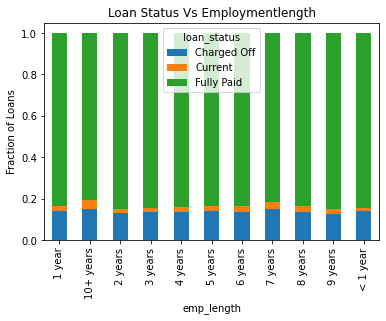

In [9]:
# Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['emp_length'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Employmentlength')
plt.show()

__Observation__

The graph shows almost equal breakup among 'Charged Off' , 'Current' and 'Fully Paid' across all the emp_length groups. Hence, it is difficult to derive any conclusion among the relation between the employment length and the chances of default.

We would proceed to compute the missing value, and replace it with a complete constant - 'Unknown'.

__Action__

We will retain the column for further analysis later but can ignore it for now


__3. Analysis of the column 'home_ownership'__

In [275]:
# Analysis for column 'home_ownership'
print(dfloan['home_ownership'].value_counts())

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


Since there are only 3 values as 'None' , we will convert them into 'Others' for better uniformity.

__Replacing the 'None' values with 'Other'__

In [10]:
dfloan['home_ownership'].replace('NONE','OTHER', inplace=True)
print(dfloan['home_ownership'].value_counts())

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64


We can do a 'Bivariate Analysis' between the column 'Home_Ownership' and 'Loan_status' to check if there is any relation between the two columns. 

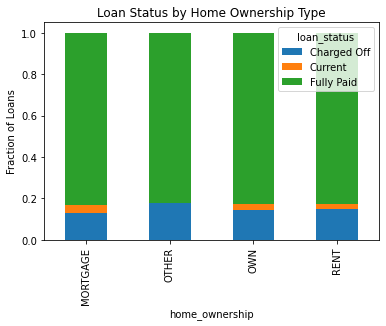

In [11]:
# Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['home_ownership'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status by Home Ownership Type')
plt.show()

__Observation__

The graph shows almost equal breakup among 'Charged Off' , 'Current' and 'Fully Paid' across all the home ownership types - 'Own', 'Rent' , 'Mortgage' and 'Others'. Hence, it is difficult to derive any conclusion among the relation between the home ownership type and the chances of default by looking at the graph.

__Action__

We will retain the column but can ignore it

__4.Analysis of the column 'verification_status'__

In [12]:
print(dfloan['verification_status'].value_counts())

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64


We can do a 'Segmented Univariate Analysis' between the column 'verification_status' and 'Loan_status' to check if there is any relation between the two columns. 

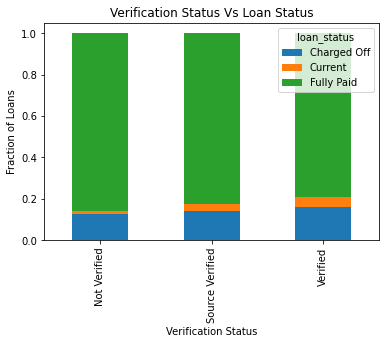

In [13]:
# Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['verification_status'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.xlabel('Verification Status')
plt.title('Verification Status Vs Loan Status')
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

__Observation__

From the analysis of the 'verification_status' column, we see that the fraction of charged off or defaulters is higher for the verified sources as compared to the not verified sources, which is contrary to the reasonable logic. This means that the verification process is not done correctly

__Action__

We will retain the column

__5. Analysis of the column 'purpose'__

This column represents a category or a reason for the loan

In [14]:
print(dfloan['purpose'].value_counts())

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64


'Bivariate Analysis' between the column 'purpose' and 'loan_status'

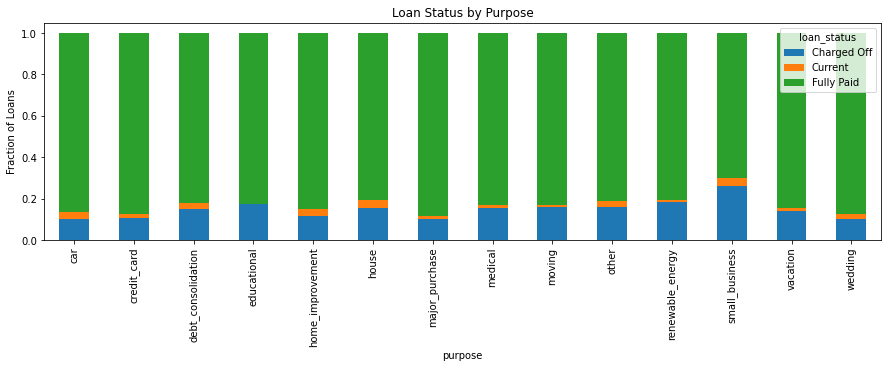

In [16]:
# Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['purpose'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status by Purpose')
plt.rcParams['figure.figsize'] = [15, 4]
plt.show()

We can also draw a bar graph to see the purpose which had the maximum loan applications.

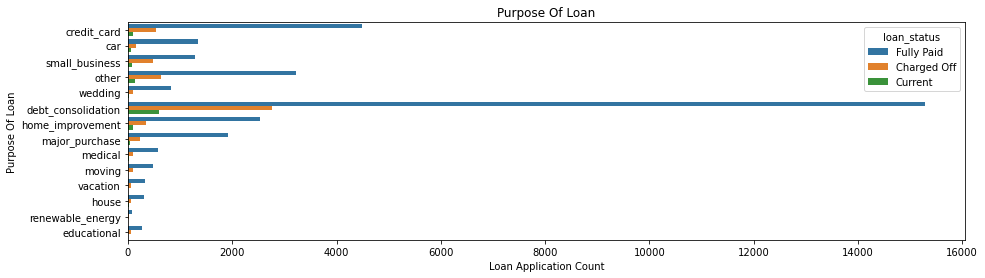

In [17]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

ax = sns.countplot(y="purpose",data=dfloan,hue='loan_status')
ax.set_title('Purpose Of Loan')
ax.set_ylabel('Purpose Of Loan')
ax.set_xlabel('Loan Application Count')  
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

__Observations__

1. The first graph shows that the highest percentage of defaulters are those who have borrowed the money for small business. This might be because their business failed and they are unable to repay back the loan
2. Some other categories like debt_consolidation, educational, house, medical, moving, other and renewable energy have higher percentage of defaulters compared to the rest
3. The second plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
4. Number of charged off count is also high for these loans purposes

__Action__

Retain the column

__6. Analysis of the column 'title'__

This is the loan title provided by the borrower

In [18]:
print(dfloan['title'].value_counts())

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64


__Observation__

From the analysis of the 'title' column, unless we have ranking or designation for the titles, it would not serve any purpose in analysis, Hence, we can drop the 'title' column.

__Action__

Drop the column

In [9]:
# Drop column 'title'
dfloan = dfloan.drop(columns=['title'])
dfloan.shape
#43 columns remaining

(39717, 43)

__7. Analysis of the columns 'mths_since_last_delinq' and 'mths_since_last_record'__

'mths_since_last_delinq'  is the number of months since the borrower's last delinquency.
'mths_since_last_record' is the number of months since the last public record.

Since we cannot impute the missing value for these two columns, we have replaced the 'NA' values with unknown in the data cleaning step

In [26]:
# Univariate Segmented Analysiprint(dfloan['mths_since_last_delinq'].value_counts())s - Unordered Categorical Variables - mths_since_last_delinq


Unknown    25682
0.0          443
15.0         252
30.0         247
23.0         247
           ...  
89.0           1
107.0          1
85.0           1
97.0           1
95.0           1
Name: mths_since_last_delinq, Length: 96, dtype: int64


In [27]:
print(dfloan['mths_since_last_record'].value_counts())

Unknown    36931
0.0          670
104.0         61
89.0          60
113.0         59
           ...  
19.0           1
20.0           1
120.0          1
129.0          1
5.0            1
Name: mths_since_last_record, Length: 112, dtype: int64


In [10]:
# Drop column 'mths_since_last_delinq' and 'mths_since_last_record'
dfloan = dfloan.drop(columns=['mths_since_last_delinq'])
dfloan = dfloan.drop(columns=['mths_since_last_record'])
dfloan.shape
#remaining 41 columns

(39717, 41)

__Observation__

Since most of the values in the two columns are 'Unknown' we cannot derive any reliable conclusion from these two columns

__Action__

Drop the colunms

__8. Analysis of the column 'last_pymnt_d'__ 

'last_pymnt_d' mentions the date of last payment received.
Since this is a column which is recorded, we cannot impute the missing value. 
We can do a __Bivariate Analysis__ of this column with the 'Loan_status' column

In [12]:
#Extract the year from the date, since the last two characters in the string represent the year, we can simple extract the last two characters from the string
dfloan['Year of last payment'] = dfloan['last_pymnt_d'].str[-2:]
print(dfloan['Year of last payment'])

0        15
1        13
2        14
3        15
4        16
         ..
39712    10
39713    10
39714    08
39715    08
39716    10
Name: Year of last payment, Length: 39717, dtype: object


In [13]:
#We will fill up the blanks with 'Not recorded'
dfloan['Year of last payment'].fillna('Not recorded', inplace=True)
dfloan['last_pymnt_d'].fillna('Not recorded', inplace=True)
print(dfloan['Year of last payment'].value_counts())

13              9458
14              9269
12              8904
11              4996
15              2431
16              2044
10              1848
09               559
08               137
Not recorded      71
Name: Year of last payment, dtype: int64


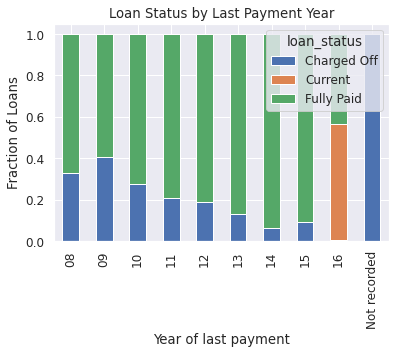

In [167]:
# Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['Year of last payment'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Last Payment Year')
plt.show()

__Observation__

1. From the graph we see that all the unpaid loans prior to 2016 have been charged off
2. There is almost a decreasing trend (except 2009) in the percentage of defaulters across the years
3. The data for the loans which have been charged off is not recorded properly, as all the cases for 'not recorded' or missing values for the last payment date is for the defaulters. However, we can ignore that as it is very small in number (only 71 not recorded)

__Action__

We will retain the column 

__9. Analysis of the column - next_pymnt_d__


This represents the next scheduled payment date. Since this is a column which is recorded, we cannot impute the missing value. We would add a constant - "Unknown". 

This column might not be very useful as most of the values are unknown, however, we shall retain this column

In [14]:
dfloan['next_pymnt_d'].fillna('Unknown', inplace=True)
print(dfloan['next_pymnt_d'].value_counts())

Unknown    38577
Jun-16      1125
Jul-16        15
Name: next_pymnt_d, dtype: int64


__10. Analysis of the column 'last_credit_pull_d'__

This represents the most recent month LC pulled credit for this loan

Since we cannot impute the missing values, we will fill up the blank cells with 'Unknown'

In [15]:
#Extract the year from the date, since the last two characters in the string represent the year, we can simple extract the last two characters from the string
#Fill the missing values with 'Not recorded'
dfloan['Year of last credit pull'] = dfloan['last_credit_pull_d'].str[-2:]
dfloan['Year of last credit pull'].fillna('Not recorded', inplace=True)
dfloan['last_credit_pull_d'].fillna('Not recorded', inplace=True)
print(dfloan['Year of last credit pull'].value_counts())

16              15371
14               6255
15               5502
13               5164
12               4079
11               2191
10                848
09                228
08                 41
07                 36
Not recorded        2
Name: Year of last credit pull, dtype: int64


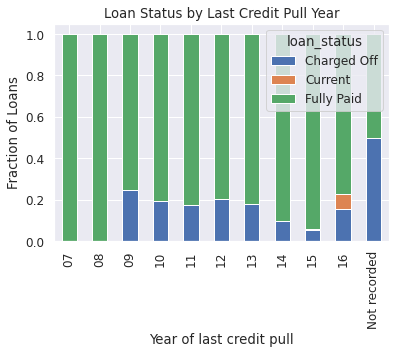

In [171]:
# Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['Year of last credit pull'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status by Last Credit Pull Year')
plt.show()

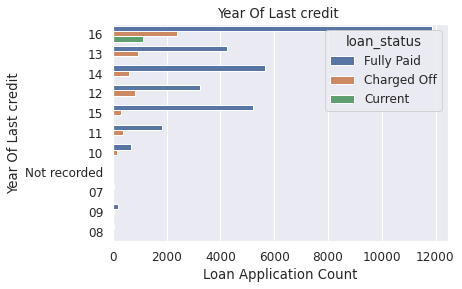

In [172]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
ax = sns.countplot(y='Year of last credit pull',data=dfloan,hue='loan_status')
ax.set_title('Year Of Last credit ')
ax.set_ylabel('Year Of Last credit')
ax.set_xlabel('Loan Application Count')      
plt.show()

__Observation:__

1. From the first graph we see that the percentage of the charged off count is highest for the credit pull last done in 2009. We can ignore the 'Not recorded' values as there are only 2 records.
2. The last credit pull for maximum number of loan applications was done in 2016. This may be because the number of loan applications are increasing Y-o-Y.
3. The count of the charged off loan applicants is also showing a somewhat increasing trend.

__Action__

Retain the column


__11. Analysis of the column 'pub_rec_bankruptcies'__

This column represents the number of public record bankruptcy. Ideally, the higher the number of bankruptcy filed, the higher is the chance of defaulting in the loan payment. 
Let us check this by analysis the column.

In [174]:
#Replacing any missing value with 'Unknown'
dfloan['pub_rec_bankruptcies'].fillna('Unknown', inplace=True)

In [175]:
#counting the values in the column
print(dfloan['pub_rec_bankruptcies'].value_counts())

0.0        37339
1.0         1674
Unknown      697
2.0            7
Name: pub_rec_bankruptcies, dtype: int64


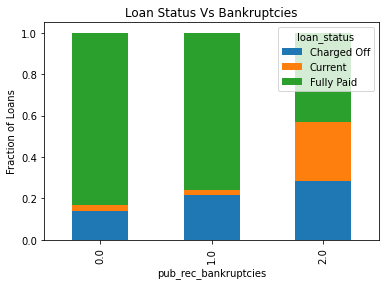

In [16]:
#Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['pub_rec_bankruptcies'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Bankruptcies')
plt.show()

__Observation:__

1. There seems to link between Recorded Bankruptcies and increase in cases of Charged Off loan status. Higher the value of recorded bankruptcy, higher is the percentage of the defaulters.
2. the number of recorded bankruptcy is only a very small percentage of the total loan applicants, and so we cannot draw any definite conclusions from it. It might be that most of the bankruptcy are not recorded.

__Action__

Retain the column

__12. Analysis of the columns 'grade' and 'Sub_grade'__

These columns represent the LC assigned grade and sub grades.

We can analyze the column 'grade' first and then if we see a strong pattern, we can analyze the column 'sub_grade'

In [192]:
#counting the values in the column
print(dfloan['grade'].value_counts())
#There are no missing or 0 values in this column

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


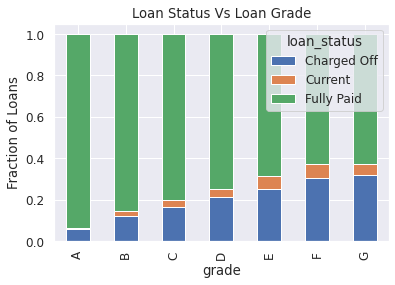

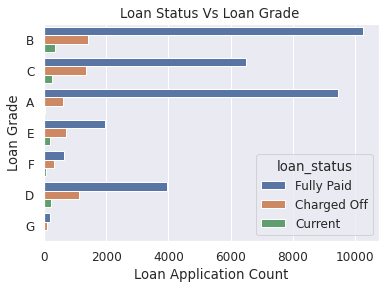

In [197]:
#Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['grade'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Loan Grade')
plt.show()

# Univariate Analysis - Loan Status Vs Loan Grade 
ax = sns.countplot(y='grade',data=dfloan,hue='loan_status')
ax.set_title('Loan Status Vs Loan Grade ')
ax.set_ylabel('Loan Grade')
ax.set_xlabel('Loan Application Count')      
plt.show()

__Observation:__

1. The count of loan application accepted is highest for Grade B, followed by Grade A and Grade C
2. The percentage of Charged off count is lowest for Grade A, followed by B, C, D, E , F and G in respective order
3. The absolute count of charged off applicants is high for B, c and D as is visible from the second graph
4. We can ignore the sub Grade column as the grade column is sufficient for the analysis

__Action__
Retain the grade column,ignore the sub-grade column

__13. Analysis of the columns 'addr_state' and 'zip_code'__

These columns represent the address of the borrower. 
We will do a Segnmented Univariate Analysis of Addr_state Vs Loan Status

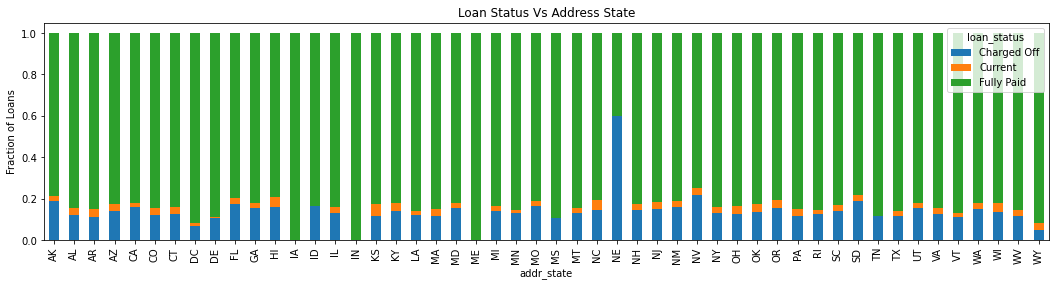

In [18]:
#Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['addr_state'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Address State')
plt.rcParams['figure.figsize'] = [18, 4]
plt.xticks(size=10)
plt.show()

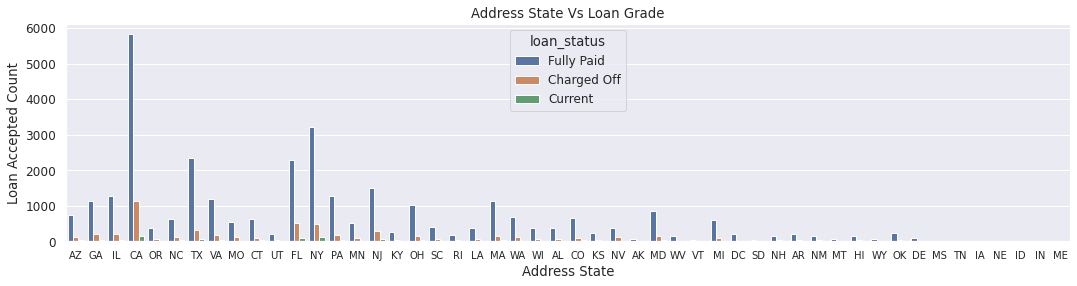

In [230]:
# Univariate Analysis - Loan Status Vs Loan Grade 
plt.figure(figsize=(18,4))
ax = sns.countplot(x='addr_state',data=dfloan,hue='loan_status')
ax.set_title('Address State Vs Loan Grade')
ax.set_xlabel('Address State')
ax.set_ylabel('Loan Accepted Count') 
plt.xticks(size=10)
plt.show()

__Observation:__

1. From the first graph, we can see that the percentage of charged off count for NE is significantly high as w.r.t to it loan accepted count. This might be beacuse of the very less number of loan accepted counts(only 5) of which 3 are charged off and 2 has fully paid. 
2. From the second graph, the loan accepted count is highest for CA(California) followed by NY(New York). 
3. The charged off count is also highest for CA, followed by FL and NY. This is beacuse of the high count of loan accepted counts

__Action__

We retain the columns

__After we have dropped the unnecessary columns and filled up the missing values in the other columns__

Let us know check the status of the remaining coloumns

In [21]:
# Listing the details of remaining columns
dfloan.info()
#total remaining columns is 43
# Existing 41 columns and 2 new columns have been added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   funded_amnt               39717 non-null  int64  
 3   funded_amnt_inv           39717 non-null  float64
 4   term                      39717 non-null  object 
 5   int_rate                  39717 non-null  object 
 6   installment               39717 non-null  float64
 7   grade                     39717 non-null  object 
 8   sub_grade                 39717 non-null  object 
 9   emp_length                38642 non-null  object 
 10  home_ownership            39717 non-null  object 
 11  annual_inc                39717 non-null  float64
 12  verification_status       39717 non-null  object 
 13  issue_d                   39717 non-null  object 
 14  loan_s

__##Analysis of the numeric columns to derive useful insights__

__A. Analysis of the columns 'loan_amnt','funded_amnt' and 'funded_amnt_inv'__

There are three columns which indicates the loan amount applied for and funded

'loan_amnt' is the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. The data type for this column is integer as seen above

'funded_amnt' is the total amount committed to that loan at that point in time. The data type for this column is integer as seen above

'funded_amnt_inv' is total amount committed by investors for that loan at that point in time. The data type for this column is float as seen above. There are some decimal values and some zero values.

To analyse the 'loan_amnt','funded_amnt' and 'funded_amnt_inv' and its significance towards the 'loan_status', let us draw a distribution graph to see the distribution.

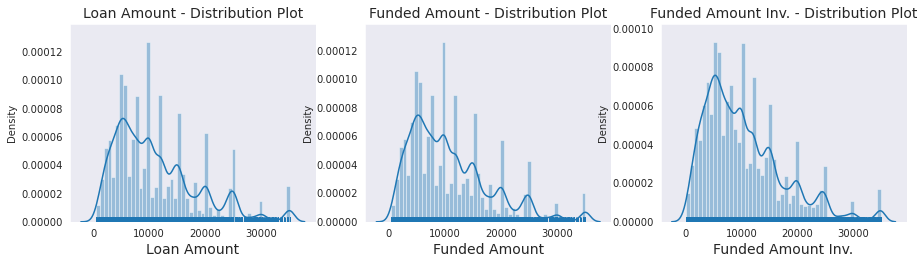

In [65]:
#converting 'funded_amnt_inv' from float to integer for the ease of calculation
dfloan['funded_amnt_inv'] = dfloan['funded_amnt_inv'].astype(int)

# Lets see distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(dfloan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Loan Amount',fontsize=14)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(dfloan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount',fontsize=14)
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(dfloan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14)
ax.set_xlabel('Funded Amount Inv.',fontsize=14)
plt.show()

__Observation:__ 
1. Distribution of amounts for all three looks very much similar.
2. It means that loan amount applied by borrower was more or less granted the same by the Lending Club.

__Action__
We will work with only loan amount column 'loan_amnt' for rest of our analysis.

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

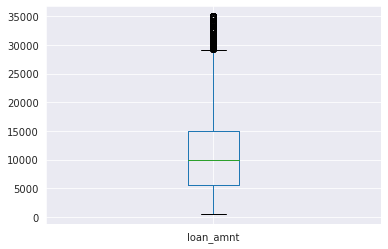

In [71]:
#Plotting a boxplot of the loan amount to see the distribution
boxplot = dfloan.boxplot(column=['loan_amnt']) 
dfloan['loan_amnt'].describe()

In [103]:
# Grouping the loan amount in groups of multiples of 5000
dfloan['Loan_Group'] = pd.cut(x=dfloan['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000],
                     labels=['0-5000','5001-10000', '10001-15000', '15001 - 20000', '20001 - 25000', '25001- 30000', '30001 - 35000'])
print(dfloan['Loan_Group'].value_counts())

5001-10000       12960
0-5000            9568
10001-15000       7986
15001 - 20000     4591
20001 - 25000     2999
30001 - 35000      828
25001- 30000       785
Name: Loan_Group, dtype: int64


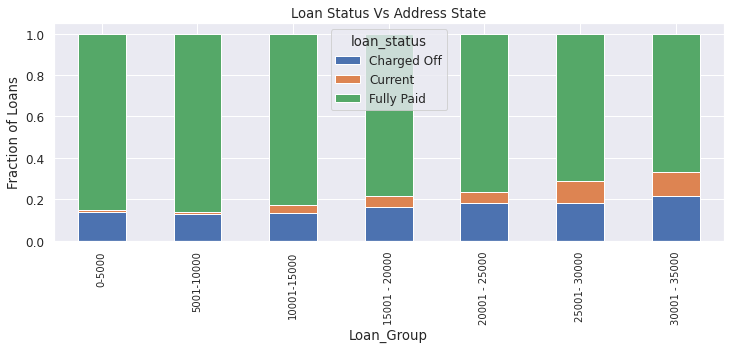

In [107]:
#Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['Loan_Group'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Address State')
plt.rcParams['figure.figsize'] = [12, 4]
plt.xticks(size=10)
plt.show()

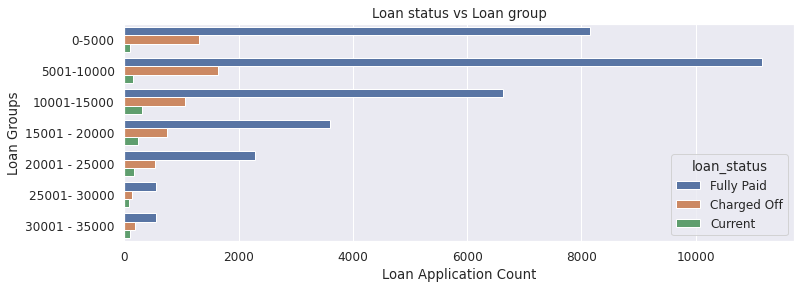

In [106]:
# Univariate Analysis - Loan amount Group Vs Loan Status
ax = sns.countplot(y="Loan_Group",data=dfloan,hue='loan_status')
ax.set_title('Loan status vs Loan group')
ax.set_ylabel('Loan Groups')
ax.set_xlabel('Loan Application Count')      
plt.show()

__Observation:__

1. Higher the loan amount, higher is the percentage of charged off candidates
2. We see that the maximum of the loan amount is between 5001 - 10000, followed by 5000 and 10000 -15000, 
3. The box plot shows that 75% of the loan amount is below 15000 
4. The count of charged off is highest for loan amount 5001 - 10000 followed by 5000 and 10000-15000. This is because the number of loan applicants in these groups is also highest

__B. Analysis of the column 'term'__

This column shows the number of payments on the loan. Values are in months and can be either 36 or 60.

In [180]:
# Counting the values in the columns
print(dfloan['term'].value_counts())
# There are no missing values or 0 in this column

 36 months    29096
 60 months    10621
Name: term, dtype: int64


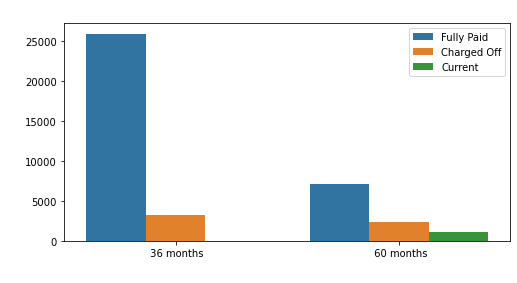

In [28]:
# Univariate Analysis - Loan Paying Term Vs Loan Status

plt.figure(figsize=(8,4))
ax = sns.countplot(x="term",data=dfloan,hue='loan_status')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

__Observation:__

1. The plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months.

__C. Analysis of the columns 'total_pymnt' , 'total_pymnt_inv','total_rec_prncp' and 'total_rec_int'__

The column 'total_pymnt' is the Payments received to date for total amount funded
The column 'total_pymnt_inv' is the Payments received to date for portion of total amount funded by investors
The column 'total_rec_prncp' is the Principal received to date
The column 'total_rec_int' is the interest received to date

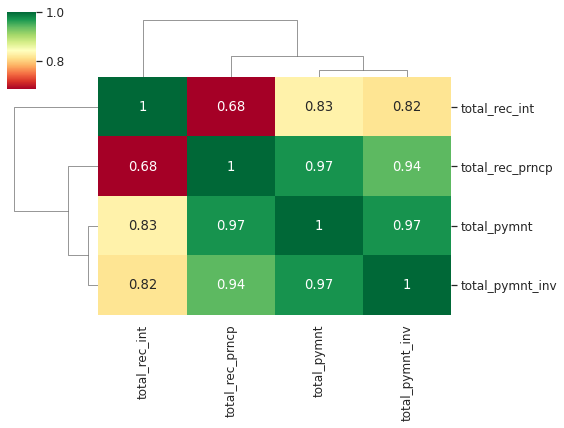

In [31]:
#Checking the correlation between the four columns
dfloan_cor = dfloan[['total_pymnt','total_pymnt_inv', 'total_rec_prncp' , 'total_rec_int']]
loan_correlation = dfloan_cor.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(8,6),cmap="RdYlGn")
plt.show()

__Observation__

1. There is a strong correlation between 'total_pymnt','total_pymnt_inv', 'total_rec_prncp'
2. There is a positive correlation between all the four columns, although the correlation of 'total_rec_int' with the other three columns is slightly lesser.

__Action__

We can , therefore, use the column 'total_payment' for further analysis to represent these four columns

__D.Analysis of the columns__

1.'int_rate'<br />
2.'loan_amnt'<br />
3.'installment'<br />
4.'annual_inc'<br />
5.'dti'<br />
6.'total_pymnt'<br />
7.'total_pymnt_inv'<br />
8.'last_pymnt_amnt'<br />
9.'recoveries' <br />
10.'collection_recovery_fee'<br />
11.'revol_bal'

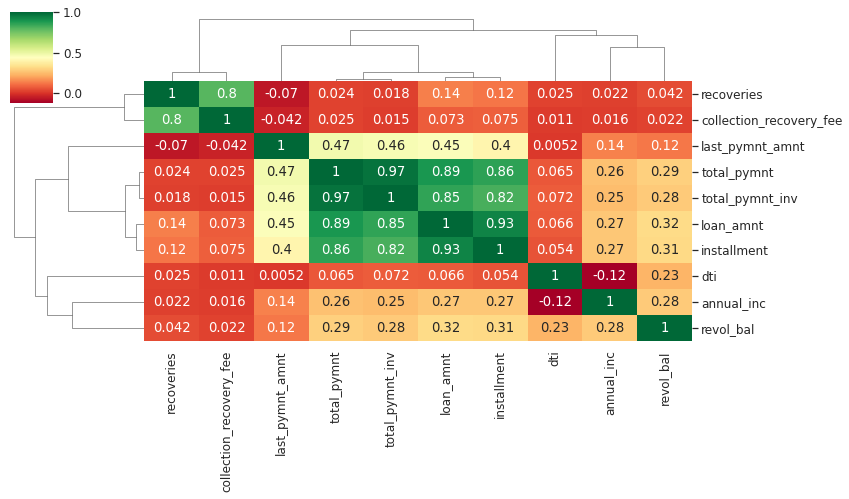

In [100]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with clustermap to show closeness among numerical variables.
 
dfloan_cor = dfloan[['loan_amnt','installment', 'annual_inc','dti','total_pymnt','total_pymnt_inv', 'last_pymnt_amnt','recoveries' , 'collection_recovery_fee','revol_bal']]
loan_correlation = dfloan_cor.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12,7),cmap="RdYlGn")
plt.show()



__Observation is that Loan amount, investor amount, funding amount are strongly correlated.__
1. Annual income with DTI(Debt-to-income ratio) is negatively correalted.Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts.That means when annual income is low DTI is high & vice versa.
2. There is a strong positive correlation between 'total_pymnt’, 'total_pymnt_inv’, ‘loan_amnt’ and ‘installment’. This means, higher the loan amount, higher is the payment towards it <br />
3. 'recoveries’ and 'collection_recovery_fee’ also shows a strong positive correlation, which means more spending on trying to do the recovery is resulting in more rercovery <br />
4. 'recoveries’ and 'collection_recovery_fee’ has negative correlation with ‘last_pymnt_amnt’, which indicates if the last payment is high, then less amount is being spent on recovering the loan
5. We have previously seen that higher the loan amount, higher is the percentage of charged off candidates. Hence, all the variables which are strongly positively correlated to 'Loan_amnt' will also show the same behaviour

__Analysis of the column 'int_rate'__

In [94]:
# Data cleaning
# Removing % symbol from intrest rate column so that it can be used in calculations
#dfloan['int_rate'] = dfloan['int_rate'].str.rstrip('%')
#print(dfloan['int_rate'])
dfloan['int_rate']= pd.to_numeric(dfloan['int_rate'].astype(int))
print(dfloan['int_rate'])

0        10
1        15
2        15
3        13
4        12
         ..
39712     8
39713    10
39714     8
39715     7
39716    13
Name: int_rate, Length: 39717, dtype: int64


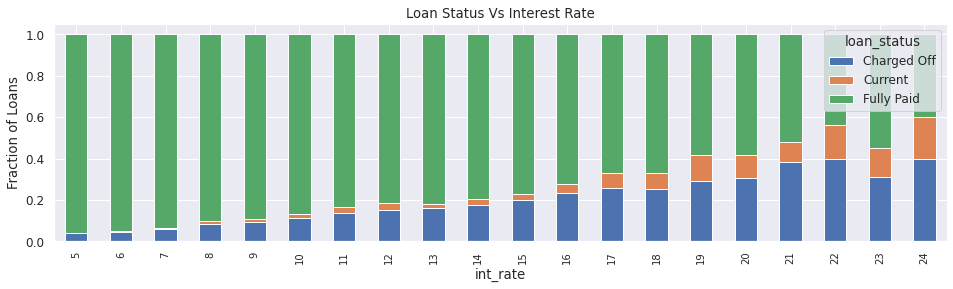

In [99]:
#Create a crosstab dataframe
cross_df = pd.crosstab(dfloan['int_rate'], dfloan['loan_status'])

# Convert counts to percentage
cross_df = cross_df.div(cross_df.sum(axis=1), axis=0)

# Plot
cross_df.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Loans')
plt.title('Loan Status Vs Interest Rate')
plt.rcParams['figure.figsize'] = [16, 4]
plt.xticks(size=10)
plt.show()

__Observation__

Higher the interest rate, higher is the charged off percentage

__E.Analysis of the column 'issue_d'__

This column indicates the month and year on which the loan was funded

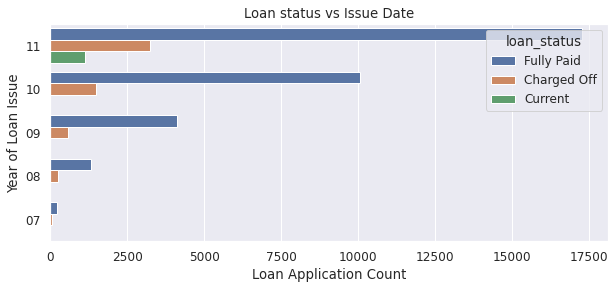

In [58]:
# Univariate Analysis - Loan Issue Date (Year) Vs Loan Status
plt.figure(figsize=(10,4))
ax = sns.countplot(y=dfloan['issue_d'].str[-2:],data=dfloan,hue='loan_status')
ax.set_title('Loan status vs Issue Date')
ax.set_ylabel('Year of Loan Issue')
ax.set_xlabel('Loan Application Count')      
plt.show()

__Observation__

1. The number of loans approved have been increasing across the years
2. The number of charged off is also increasing across the years consequently
3. The loans issued in or before 2010 are either fully paid or charged off.

__F.Analysis of the column 'earliest_cr_line'__

The month the borrower's earliest reported credit line was opened

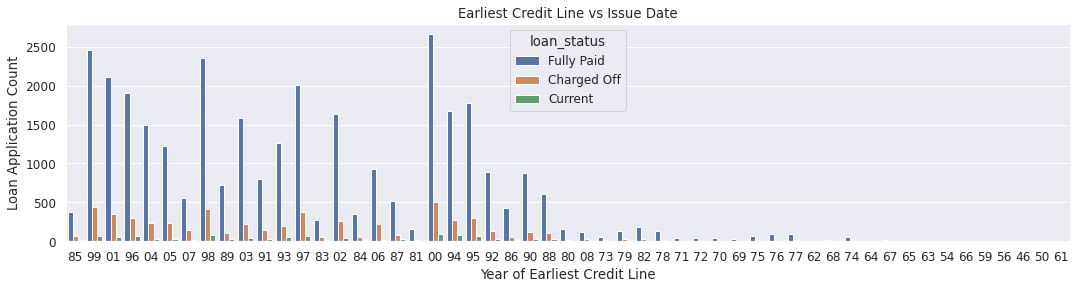

In [65]:
# Univariate Analysis - Earliest Credit Line (Year) Vs Loan Status
plt.figure(figsize=(18,4))
ax = sns.countplot(x=dfloan['earliest_cr_line'].str[-2:],data=dfloan,hue='loan_status')
ax.set_title('Earliest Credit Line vs Issue Date')
ax.set_xlabel('Year of Earliest Credit Line')
ax.set_ylabel('Loan Application Count')      
plt.show()

__Observation__

1. The graph shows that the highest number of loan approved was for those whose earliest credit line was in 2000, followed by 1999 and 1998
2. The count of charged off loans are also highest for these years

__G.Analysis of the column 'open_acc'__

The number of open credit lines in the borrower's credit file.

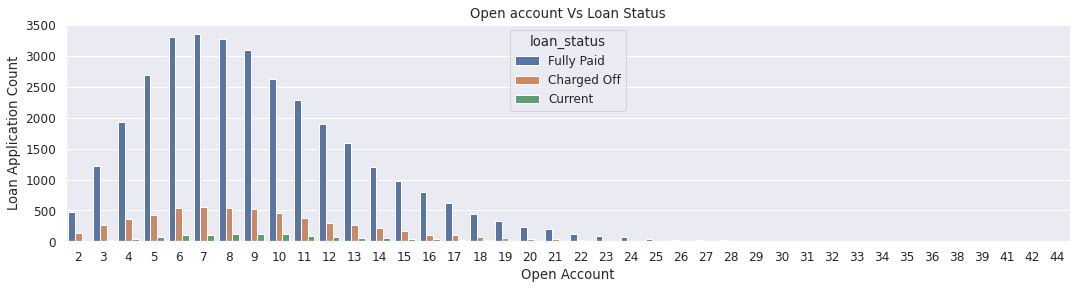

In [67]:
# Univariate Analysis - Open account Vs Loan Status
plt.figure(figsize=(18,4))
ax = sns.countplot(x=dfloan['open_acc'],data=dfloan,hue='loan_status')
ax.set_title('Open account Vs Loan Status')
ax.set_xlabel('Open Account')
ax.set_ylabel('Loan Application Count')      
plt.show()

__Observation__

1. The graph shows that the highest number of loan approved was for those whose open credit accounts are 7,6,8,and 9
2. The count of charged off loans are also highest for candidates with open credit 7,6,8,and 9

__H.Analysis of the columns__

1.'delinq_2yrs' <br />
2.'inq_last_6mths' <br />
3.'open_acc' <br />
4.'pub_rec'<br />
5.'total_acc'

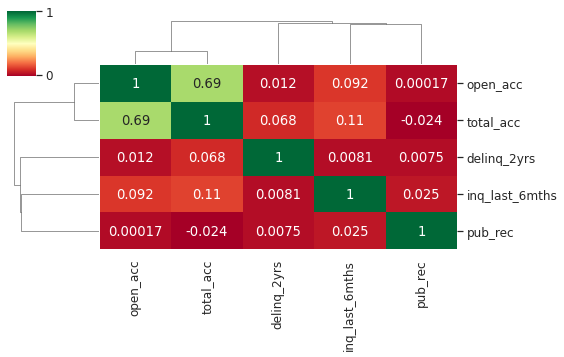

In [78]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with clustermap to show closeness among numerical variables.
 
dfloan_cor = dfloan[['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec','total_acc']]
loan_correlation = dfloan_cor.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(8,5),cmap="RdYlGn")
plt.show()

__I. Analysis of the columns 'out_prncp' and 'out_prncp_inv'__

In [82]:
# Bivariate Analysis - Correlation between the two columns
corr= dfloan['out_prncp'].corr(dfloan['out_prncp_inv'])
print(corr)

0.9998274655132996


__Observation__

1. The correlation between the two columns is almost 1, which means they are highly correlated
2. Hence, we can consider only one of them for analysis

#### __Conclusion__

1. The charged off count is also highest for CA, followed by FL and NY. This is beacuse of the high count of loan accepted counts
2. The count of charged off loans are also highest for these year 2000, followed by 1999 and 1998
3. The percentage of Charged off count is lowest for Grade A, followed by B, C, D, E , F and G in respective order
4. Higher the interest rate leads to higher charged off percentage
5. The number of charged off is also increasing across the years consequently
6. Charged off count is highest for the credit pull last done in 2009.
7. There is almost a decreasing trend (except 2009) in the percentage of defaulters across the years
8. Higher the loan amount, higher is the percentage of charged off candidates
9. The count of charged off loans are also highest for candidates with open credit 7,6,8,and 9
10. Higher the value of recorded bankruptcy, higher is the percentage of the defaulters.
11. Highest percentage of defaulters are those who have borrowed the money for small business.
12. 60 months term had more % of number of applicants getting charged off as compared to 36 months.